In [3]:
!pip install causalinference
!git clone https://github.com/Causal-Inferance/propensity-score-dataset.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'propensity-score-dataset'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 0), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


In [4]:
!ls

propensity-score-dataset  sample_data


In [7]:
from causalinference import CausalModel
import pickle

df = pickle.load( open( "/content/propensity-score-dataset/df_propensity_score.p", "rb" ) )


In [8]:
df

,age,hours-per-week,hasGraduateDegree,inRelationship,isWhite,isFemale,greaterThan50k
0,39,40,0,0,1,0,0
1,50,13,0,1,1,0,0
2,38,40,0,0,1,0,0
3,53,40,0,1,0,0,0
5,37,40,1,0,1,1,0
...,...,...,...,...,...,...,...
32556,27,38,0,0,1,1,0
32557,40,40,0,1,1,0,1
32558,58,40,0,0,1,1,0
32559,22,20,0,0,1,0,0


In [9]:
df.head()

,age,hours-per-week,hasGraduateDegree,inRelationship,isWhite,isFemale,greaterThan50k
0,39,40,0,0,1,0,0
1,50,13,0,1,1,0,0
2,38,40,0,0,1,0,0
3,53,40,0,1,0,0,0
5,37,40,1,0,1,1,0


Calculating Probability Distributions of the data

For age 
Mean: 38.65567363729859 
Standard Deviation: 13.722408212900303 
Min-Max (17, 90)


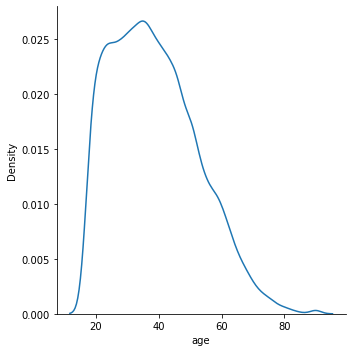


For hours-per-week 
Mean: 40.44775454233802 
Standard Deviation: 12.417203423445143 
Min-Max (1, 99)


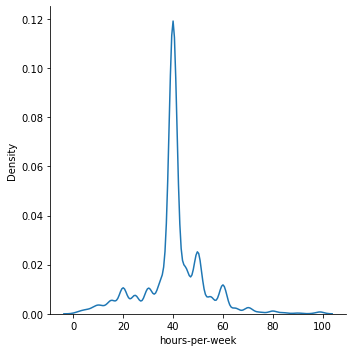


For hasGraduateDegree 
Mean: 0.052348303051079875 
Standard Deviation: 0.2227322583888048 
Min-Max (0, 1)
Binary


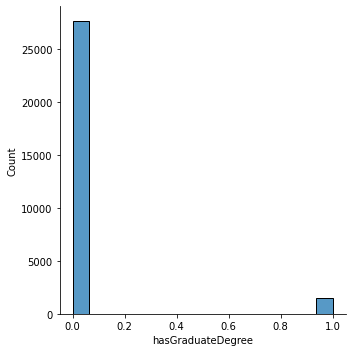


For inRelationship 
Mean: 0.406616386698663 
Standard Deviation: 0.4912105175432122 
Min-Max (0, 1)
Binary


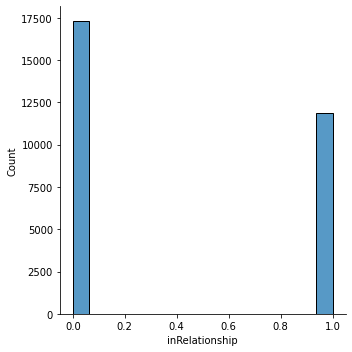


For isWhite 
Mean: 0.8783339046966061 
Standard Deviation: 0.32690536880551646 
Min-Max (0, 1)
Binary


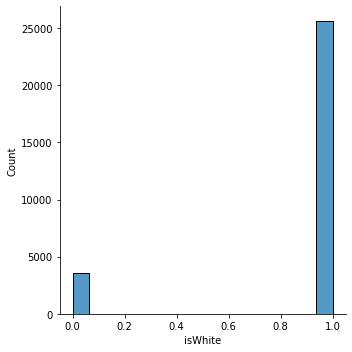


For isFemale 
Mean: 0.3319163524168666 
Standard Deviation: 0.47090921587041196 
Min-Max (0, 1)
Binary


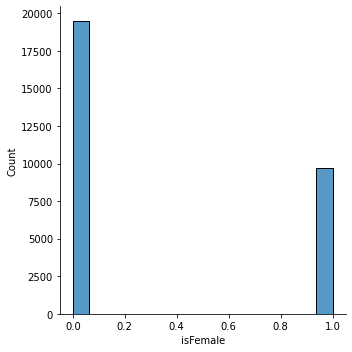


For greaterThan50k 
Mean: 0.24583476174151525 
Standard Deviation: 0.43058842033319544 
Min-Max (0, 1)
Binary


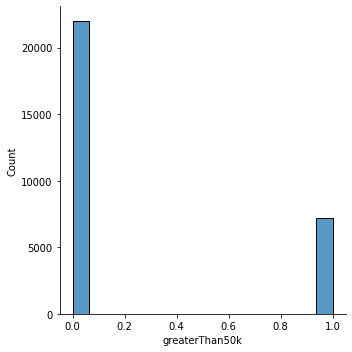

In [10]:
import scipy.stats as spst
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli

for i in df.columns:
  # plt.hist(df[i])
  print("For", i, "\nMean:", spst.describe(df[i]).mean, "\nStandard Deviation:", spst.describe(df[i]).variance**0.5, "\nMin-Max", spst.describe(df[i]).minmax)
  if (spst.describe(df[i]).minmax == (0, 1)):
    # binary binomial dist
    print("Binary")
    sns.displot(data=df, x=i)
    plt.show()
  else:
    sns.displot(data=df, x=i, kind = "kde")
    plt.show()

  print()
# spst.bayes_mvs(df['age'])

In [11]:
import numpy as np
Y = np.array(df['greaterThan50k']) # variable that is influenced
D = np.array(df['hasGraduateDegree']) # treatment that we apply
X = np.array(df[['age', 'hours-per-week', 'inRelationship', 'isWhite', 'isFemale']])

model = CausalModel(Y, D, X)

In [12]:
print(model.summary_stats)

# if graduated, higher mean implies greater probability of having salary > 50k
# on average, people with salary > 50k
# 1. Are older (44.3 vs 38.3)
# 2. work more hours per week (44.1 vs 40.2)
# 3. minor effect of being in a relationship (0.1 diff)
# 4. minor effect of race (0.06 diff)
# 5. negligible effect of gender (-0.08 dif)
# check nor(malised)-diff for more insights into how a variable affects the outcomes


Summary Statistics

                     Controls (N_c=27643)        Treated (N_t=1527)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y        0.228        0.420        0.567        0.496        0.339

                     Controls (N_c=27643)        Treated (N_t=1527)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0       38.341       13.794       44.351       10.894        0.484
             X1       40.242       12.399       44.169       12.156        0.320
             X2        0.401        0.490        0.506        0.500        0.211
             X3        0.875        0.331        0.937        0.243        0.214
             X4        0.332        0.471        0.324        0.468       -0.019



In [13]:
import numpy as np
all_cols = list(df.columns)
all_cols.remove('greaterThan50k')
treatments = ['hasGraduateDegree', 'inRelationship', 'isWhite', 'isFemale']

for i in treatments:
  spec = all_cols.copy()
  spec.remove(i)
  print("Treatment:", i, "\nX0:", spec[0], "\nX1:", spec[1], "\nX2:", spec[2], "\nX3:", spec[3], "\nX4:", spec[4])
  Y = np.array(df['greaterThan50k']) # variable that is influenced
  D = np.array(df[i]) # treatment that we apply
  X = np.array(df[spec])
  model = CausalModel(Y, D, X)
  print(model.summary_stats)
  print()


Treatment: hasGraduateDegree 
X0: age 
X1: hours-per-week 
X2: inRelationship 
X3: isWhite 
X4: isFemale

Summary Statistics

                     Controls (N_c=27643)        Treated (N_t=1527)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y        0.228        0.420        0.567        0.496        0.339

                     Controls (N_c=27643)        Treated (N_t=1527)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0       38.341       13.794       44.351       10.894        0.484
             X1       40.242       12.399       44.169       12.156        0.320
             X2        0.401        0.490        0.506        0.500        0.211
             X3        0.875        0.331        0.937        0

In [14]:
model.est_via_ols(adj = 1) # adj = 1 assumes constant treatment effect, 2 is default
print(model.estimates)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.023      0.005      5.142      0.000      0.014      0.032



/usr/local/lib/python3.8/dist-packages/causalinference/estimators/ols.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  olscoef = np.linalg.lstsq(Z, Y)[0]


In [15]:
# model.est_propensity([0, 1, 2], [(1, 2)])
model.est_propensity_s()
print(model.propensity)


Estimated Parameters of Propensity Score

                    Coef.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
     Intercept     -0.461      0.185     -2.492      0.013     -0.824     -0.099
            X3     -9.793      1.000     -9.790      0.000    -11.753     -7.832
            X0      0.085      0.006     13.495      0.000      0.073      0.097
            X1     -0.027      0.004     -6.622      0.000     -0.035     -0.019
            X4      0.044      0.167      0.261      0.794     -0.284      0.371
            X2     -0.241      0.287     -0.842      0.400     -0.803      0.321
         X0*X0     -0.001      0.000     -9.675      0.000     -0.001     -0.001
         X1*X2      0.014      0.006      2.160      0.031      0.001      0.026
         X1*X4     -0.009      0.004     -2.008      0.045     -0.017     -0.000



In [16]:
!pip install dowhy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 14.2 MB/s 
  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0


Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                                                    
────────────────────(Expectation(greaterThan50k|age,inRelationship,hours-per-w
d[hasGraduateDegree]                                                          

                      
eek,isWhite,isFemale))
                      
Estimand assumption 1, Unconfoundedness: If U→{hasGraduateDegree} and U→greaterThan50k then P(greaterThan50k|hasGraduateDegree,age,inRelationship,hours-per-week,isWhite,isFemale,U) = P(greaterThan50k|hasGraduateDegree,age,inRelationship,hours-per-week,isWhite,isFemale)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

propensity_score_stratification


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                                                    
────────────────────(Expectation(greaterThan50k|age,inRelationship,hours-per-w
d[hasGraduateDegree]                                                          

                      
eek,isWhite,isFemale))
                      
Estimand assumption 1, Unconfoundedness: If U→{hasGraduateDegree} and U→greaterThan50k then P(greaterThan50k|hasGraduateDegree,age,inRelationship,hours-per-week,isWhite,isFemale,U) = P(greaterThan50k|hasGraduateDegree,age,inRelationship,hours-per-week,isWhite,isFemale)

## Realized estimand
b: greaterThan50k~hasGraduateDegree+age+inRelationship+hours-per-week+isWhite+isFemale
Target units: ate

## Estimate
Mean value: 0.2620946824497762

Causal Estimate is 0.2620946824497762


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Refute: Add a random common cause
Estimated effect:0.2620946824497762
New effect:0.26176524698407894
p value:0.94



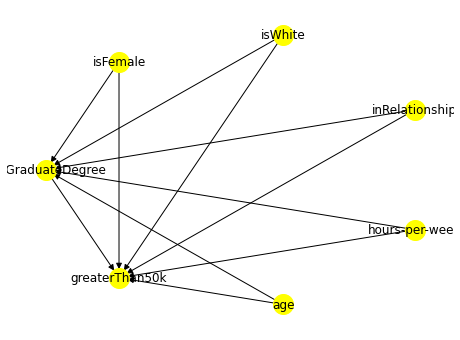

In [17]:
from dowhy import CausalModel as cml

m2 = cml(data = df, treatment = "hasGraduateDegree", outcome = "greaterThan50k", common_causes = ['age', 'hours-per-week', 'inRelationship', 'isWhite', 'isFemale'])
m2.view_model()

# II. Identify causal effect and return target estimands
identified_estimand = m2.identify_effect(proceed_when_unidentifiable=False)
print(identified_estimand)

estimate = m2.estimate_effect(identified_estimand, method_name="backdoor.propensity_score_stratification")         
print(estimate)
print("Causal Estimate is " + str(estimate.value))

res_random = m2.refute_estimate(identified_estimand, estimate, method_name="random_common_cause", show_progress_bar=True)
print(res_random)

# # III. Estimate the target estimand using a statistical method.
# estimate = m2.estimate_effect(identified_estimand,
#                                  method_name="backdoor.propensity_score_matching")

# # IV. Refute the obtained estimate using multiple robustness checks.
# refute_results = m2.refute_estimate(identified_estimand, estimate,
#                                        method_name="random_common_cause")